# Data Science Capstone Project - The Battle of the Neighborhoods (Week 2)

## Table of contents
* [Introduction](#Introduction)
* [Data](#Data)
* [Methodology](#Methodology)
* [Results](#Results)
* [Discussion](#Discussion)
* [Conclusion](#Conclusion)


# Introduction
COVID-19 pandemic caused many illness and deaths of human. In the US, the situation is still very bad since the spread is not under control so far. Every state is fighting hard fo the COVID-19 including the tracking and actively testing. 

In this project, we will follow the active cases daily and total cases for the south cariloina state. The data will be viewed through choropleth map to show the **hotspots** in the state. Then we will recommended  the closest the clinic for the **testing**. 

This project will give the local community (our audience) visual information for the current covid status. Also, this program can be scalled to small local area or other local commnities based on the dataset. 



# Data

The data will be scraped from [worldometer](https://www.worldometers.info/coronavirus/usa/south-carolina/) into dataframe and cleaned. The data will be categorizied into each county in the state. The data will include the 'total cases', 'new cases' 'total deaths', and 'new deaths'. The data will be reviewed through choropleth map to find the hotspot. Exploratory data analysis and linear regression will be conducted to find the relationship between popluation and the total covid cases

For the hotspot area, Urgent care or pharmacy store will be loacated throught **Foursquare API** to give the reommendation for testing. Based on the longitude and lantitue info of the hotspots, the hospitals and urgent care will be listed for selection.


In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
from datetime import date # adding the date for the data scrape
import seaborn as sns
import folium
import matplotlib.pyplot as plt # Graph analysis
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Scape the data from [worldometer](https://www.worldometers.info/coronavirus/usa/south-carolina/) into dataframe

In [2]:
url='https://www.worldometers.info/coronavirus/usa/south-carolina/'
r = requests.get(url)
df1 = pd.read_html(r.text) # get the data
df1[0].head()

County  TotalCases  NewCases  TotalDeaths  NewDeaths  \
0  South Carolina Total      394318       NaN         6259        NaN   
1            Greenville       48291       NaN          583        NaN   
2              Richland       29328       NaN          354        NaN   
3            Charleston       25266       NaN          317        NaN   
4           Spartanburg       23164       NaN          446        NaN   

   ActiveCases  TotalTests             Source  
0     210320.0   4402976.0                NaN  
1          NaN         NaN  [county]* [state]  
2          NaN         NaN  [county]* [state]  
3          NaN         NaN  [county]* [state]  
4          NaN         NaN  [county]* [state]

### Drop the columns which do not have data and also drop the row 1
### Adding the date for the scrape date

In [3]:
df=df1[0]
df=df[['County','TotalCases','NewCases','TotalDeaths','NewDeaths']] #select the column with data only
date = date.today()
df['Date'] = date # adding the date column
df=df[1:47] # drop the first row
df.head()


<ipython-input-3-409a276299b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = date # adding the date column


County  TotalCases  NewCases  TotalDeaths  NewDeaths        Date
1   Greenville       48291       NaN          583        NaN  2021-01-20
2     Richland       29328       NaN          354        NaN  2021-01-20
3   Charleston       25266       NaN          317        NaN  2021-01-20
4  Spartanburg       23164       NaN          446        NaN  2021-01-20
5        Horry       21923       NaN          306        NaN  2021-01-20

In [4]:
df["Newcases"] = df.NewCases.astype(float)
df.set_index('County')

TotalCases  NewCases  TotalDeaths  NewDeaths        Date  \
County                                                                   
Greenville         48291       NaN          583        NaN  2021-01-20   
Richland           29328       NaN          354        NaN  2021-01-20   
Charleston         25266       NaN          317        NaN  2021-01-20   
Spartanburg        23164       NaN          446        NaN  2021-01-20   
Horry              21923       NaN          306        NaN  2021-01-20   
Lexington          19651       NaN          303        NaN  2021-01-20   
York               18547       NaN          193        NaN  2021-01-20   
Anderson           14721       NaN          304        NaN  2021-01-20   
Pickens            12935       NaN          167        NaN  2021-01-20   
Florence           12681       NaN          293        NaN  2021-01-20   
Beaufort           11127       NaN          121        NaN  2021-01-20   
Berkeley           10156       NaN          110        NaN  2021-01-20   
Aiken               9619       NaN          132        NaN  2021-01-20   
Dorchester          8701       NaN          120        NaN  2021-01-20   
Sumter              6687       NaN          121        NaN  2021-01-20   
Oconee              6497       NaN           77        NaN  2021-01-20   
Orangeburg          6450       NaN          167        NaN  2021-01-20   
Lancaster           6358       NaN           94        NaN  2021-01-20   
Greenwood           5219       NaN           98        NaN  2021-01-20   
Darlington          4928       NaN          101        NaN  2021-01-20   
Laurens             4667       NaN           98        NaN  2021-01-20   
Kershaw             4413       NaN           74        NaN  2021-01-20   
Cherokee            3657       NaN           94        NaN  2021-01-20   
Georgetown          3641       NaN           74        NaN  2021-01-20   
Newberry            3073       NaN           69        NaN  2021-01-20   
Dillon              2992       NaN           60        NaN  2021-01-20   
Chester             2757       NaN           46        NaN  2021-01-20   
Williamsburg        2578       NaN           56        NaN  2021-01-20   
Marion              2479       NaN           74        NaN  2021-01-20   
Chesterfield        2339       NaN           66        NaN  2021-01-20   
Clarendon           2061       NaN           77        NaN  2021-01-20   
Colleton            2042       NaN           62        NaN  2021-01-20   
Marlboro            1992       NaN           29        NaN  2021-01-20   
Edgefield           1760       NaN           19        NaN  2021-01-20   
Barnwell            1726       NaN           33        NaN  2021-01-20   
Union               1700       NaN           49        NaN  2021-01-20   
Jasper              1591       NaN           27        NaN  2021-01-20   
Fairfield           1580       NaN           53        NaN  2021-01-20   
Lee                 1349       NaN           43        NaN  2021-01-20   
Abbeville           1342       NaN           21        NaN  2021-01-20   
Hampton             1200       NaN           33        NaN  2021-01-20   
Saluda              1111       NaN           26        NaN  2021-01-20   
Bamberg             1098       NaN           43        NaN  2021-01-20   
Calhoun              950       NaN           23        NaN  2021-01-20   
Allendale            615       NaN            9        NaN  2021-01-20   
McCormick            546       NaN            8        NaN  2021-01-20   

              Newcases  
County                  
Greenville         NaN  
Richland           NaN  
Charleston         NaN  
Spartanburg        NaN  
Horry              NaN  
Lexington          NaN  
York               NaN  
Anderson           NaN  
Pickens            NaN  
Florence           NaN  
Beaufort           NaN  
Berkeley           NaN  
Aiken              NaN  
Dorchester         NaN  
Sumter             NaN  
Oconee             NaN  
Orangeburg 

In [5]:
df.shape # check the shape

(46, 7)

### Get the county population data

In [6]:
url_p='https://www.southcarolina-demographics.com/counties_by_population'
r = requests.get(url_p)
df_p = pd.read_html(r.text) # get the population data
df_p[0].head()

Rank              County Population
0    1   Greenville County     507003
1    2     Richland County     411357
2    3   Charleston County     401165
3    4        Horry County     332172
4    5  Spartanburg County     307617

In [7]:
# Creat the dataframe for the population data
df2=df_p[0]
df2=df2[0:46]
len(df2)



46

In [8]:
# clean the data to remove the "county" in the county column
for i in range (len(df2)):
    df2.iloc[i,1]=df2.iloc[i,1].split(' ', 1)[0]
df2.head()
    
    

C:\Users\yu\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-8-79986c1ec9bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.iloc[i,1]=df2.iloc[i,1].split(' ', 1)[0]


Rank       County Population
0    1   Greenville     507003
1    2     Richland     411357
2    3   Charleston     401165
3    4        Horry     332172
4    5  Spartanburg     307617

In [9]:
df2.dtypes

Rank          object
County        object
Population    object
dtype: object

In [10]:
df2["Population"] = df2.Population.astype(float) # transform the float for graphing 
df2.set_index('County')

<ipython-input-10-4666d1a8311f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Population"] = df2.Population.astype(float) # transform the float for graphing


Rank  Population
County                       
Greenville      1    507003.0
Richland        2    411357.0
Charleston      3    401165.0
Horry           4    332172.0
Spartanburg     5    307617.0
Lexington       6    290278.0
York            7    265872.0
Berkeley        8    215044.0
Anderson        9    198064.0
Beaufort       10    186095.0
Aiken          11    168301.0
Dorchester     12    158299.0
Florence       13    138475.0
Pickens        14    124029.0
Sumter         15    106757.0
Lancaster      16     92308.0
Orangeburg     17     87687.0
Oconee         18     77528.0
Greenwood      19     70411.0
Darlington     20     67027.0
Laurens        21     66846.0
Kershaw        22     65112.0
Georgetown     23     61952.0
Cherokee       24     56895.0
Chesterfield   25     45953.0
Newberry       26     38194.0
Colleton       27     37585.0
Clarendon      28     33957.0
Chester        29     32311.0
Williamsburg   30     31324.0
Marion         31     31308.0
Dillon         32     30689.0
Jasper         33     28657.0
Union          34     27490.0
Edgefield      35     26927.0
Marlboro       36     26753.0
Abbeville      37     24627.0
Fairfield      38     22565.0
Barnwell       39     21346.0
Saluda         40     20303.0
Hampton        41     19564.0
Lee            42     17365.0
Calhoun        43     14663.0
Bamberg        44     14376.0
McCormick      45      9531.0
Allendale      46      9024.0

In [11]:
df_final=pd.merge(df, df2, on='County', how='left') # combine two data frames into one with 'left' method
df_final.head()

County  TotalCases  NewCases  TotalDeaths  NewDeaths        Date  \
0   Greenville       48291       NaN          583        NaN  2021-01-20   
1     Richland       29328       NaN          354        NaN  2021-01-20   
2   Charleston       25266       NaN          317        NaN  2021-01-20   
3  Spartanburg       23164       NaN          446        NaN  2021-01-20   
4        Horry       21923       NaN          306        NaN  2021-01-20   

   Newcases Rank  Population  
0       NaN    1    507003.0  
1       NaN    2    411357.0  
2       NaN    3    401165.0  
3       NaN    5    307617.0  
4       NaN    4    332172.0

# Methodology

Exploratory data analysis was conducted to understand the COVID case distribution in the states. The **folium map with choropleth** to visualize the COVID **hotspot**, which is quick and direct way to show the audience.  Then **linear regression** analysis was conducted to understand the relationship between total cases and the population. **Polynomial regression** was futher tested to check which is a better fitting for the data. 

After the data analysis, **Foursquare API** was utilized for seraching the COVID test places around hotspot area. The locations are displayed on the Folium map to help people find the cloest places.


# Results

### The final data table includes the total cases for the each county, and the population for the county.

In [12]:
df_final

County  TotalCases  NewCases  TotalDeaths  NewDeaths        Date  \
0     Greenville       48291       NaN          583        NaN  2021-01-20   
1       Richland       29328       NaN          354        NaN  2021-01-20   
2     Charleston       25266       NaN          317        NaN  2021-01-20   
3    Spartanburg       23164       NaN          446        NaN  2021-01-20   
4          Horry       21923       NaN          306        NaN  2021-01-20   
5      Lexington       19651       NaN          303        NaN  2021-01-20   
6           York       18547       NaN          193        NaN  2021-01-20   
7       Anderson       14721       NaN          304        NaN  2021-01-20   
8        Pickens       12935       NaN          167        NaN  2021-01-20   
9       Florence       12681       NaN          293        NaN  2021-01-20   
10      Beaufort       11127       NaN          121        NaN  2021-01-20   
11      Berkeley       10156       NaN          110        NaN  2021-01-20   
12         Aiken        9619       NaN          132        NaN  2021-01-20   
13    Dorchester        8701       NaN          120        NaN  2021-01-20   
14        Sumter        6687       NaN          121        NaN  2021-01-20   
15        Oconee        6497       NaN           77        NaN  2021-01-20   
16    Orangeburg        6450       NaN          167        NaN  2021-01-20   
17     Lancaster        6358       NaN           94        NaN  2021-01-20   
18     Greenwood        5219       NaN           98        NaN  2021-01-20   
19    Darlington        4928       NaN          101        NaN  2021-01-20   
20       Laurens        4667       NaN           98        NaN  2021-01-20   
21       Kershaw        4413       NaN           74        NaN  2021-01-20   
22      Cherokee        3657       NaN           94        NaN  2021-01-20   
23    Georgetown        3641       NaN           74        NaN  2021-01-20   
24      Newberry        3073       NaN           69        NaN  2021-01-20   
25        Dillon        2992       NaN           60        NaN  2021-01-20   
26       Chester        2757       NaN           46        NaN  2021-01-20   
27  Williamsburg        2578       NaN           56        NaN  2021-01-20   
28        Marion        2479       NaN           74        NaN  2021-01-20   
29  Chesterfield        2339       NaN           66        NaN  2021-01-20   
30     Clarendon        2061       NaN           77        NaN  2021-01-20   
31      Colleton        2042       NaN           62        NaN  2021-01-20   
32      Marlboro        1992       NaN           29        NaN  2021-01-20   
33     Edgefield        1760       NaN           19        NaN  2021-01-20   
34      Barnwell        1726       NaN           33        NaN  2021-01-20   
35         Union        1700       NaN           49        NaN  2021-01-20   
36        Jasper        1591       NaN           27        NaN  2021-01-20   
37     Fairfield        1580       NaN           53        NaN  2021-01-20   
38           Lee        1349       NaN           43        NaN  2021-01-20   
39     Abbeville        1342       NaN           21        NaN  2021-01-20   
40       Hampton        1200       NaN           33        NaN  2021-01-20   
41        Saluda        1111       NaN           26        NaN  2021-01-20   
42       Bamberg        1098       NaN           43        NaN  2021-01-20   
43       Calhoun         950       NaN           23        NaN  2021-01-20   
44     Allendale         615       NaN            9        NaN  2021-01-20   
45     McCormick         546       NaN            8        NaN  2021-01-20   

    Newcases Rank  Population  
0        NaN    1    507003.0  
1        NaN    2    411357.0  
2        NaN    3    401165.0  
3        NaN    5    307617.0  
4        NaN    4    332172.0  
5        NaN    6    290278.0  
6        NaN    7    265872.0  
7        NaN    9    198064.0  
8        NaN   14    124029.0  
9        NaN   13    13

In [13]:
sc=folium.Map(location=[33.836082, -81.163727],zoom_start=8)

In [14]:
import json
sc_geo=open('C:/Users/yu/Desktop/IBM COURSE/sc-1.geojson').read()

In [15]:
sc.choropleth(
    geo_data=sc_geo,
    data=df_final,
    columns=['County', 'TotalCases'],
    key_on='properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='TotalCases in South Carolina Counties')

## display map     it is centred around San Francisco,
sc

C:\Users\yu\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


# Discussion

### Scatter plot was first used to show the relationship between TotalCases and the popultion of the county

In [16]:
ax1 = df_final.plot.scatter(x='Population',
                      y='TotalCases',
                      c='DarkBlue')
ax1.set_title('Total cases versus County Population', fontsize=16)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

### Data was fitted throught linear Regression and display through graphy below

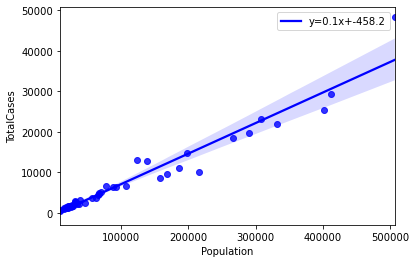

In [17]:
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(df_final['Population'], df['TotalCases'])

# use line_kws to set line label for legend
ax=sns.regplot(x="Population", y="TotalCases", data=df_final,color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

### For the high population the linear regresssion does not fit well. Greenvill county is a outlier in the linear regression. Below the residue plot was further shown.


In [18]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df_final['Population'], df['TotalCases'])
plt.show()

C:\Users\yu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [19]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(1, 600000, 1000)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Total Cases ~ Population')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Total Cases')

    plt.show()
    plt.close()

In [20]:
x = df_final['Population']
y = df_final['TotalCases']
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 2)
p = np.poly1d(f)
print(p)

           2
7.906e-08 x + 0.04273 x + 993


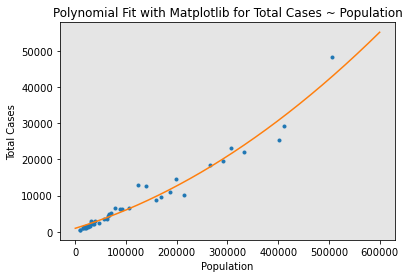

In [21]:
PlotPolly(p, x, y, 'Population')

In [22]:
np.polyfit(x, y, 2)

array([7.90578481e-08, 4.27339367e-02, 9.93006402e+02])

### Polynomial fitting is much better than the linear regression especailly on the high population area

### FourSquare API

In [23]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


In [24]:
CLIENT_ID = 'W1OCU4ILZPW5VRIFQUBQ5NSOMK0UTRFT2CGNNL0AUIHEP4RS' # your Foursquare ID
CLIENT_SECRET = 'WS0HN10Q51PWN3GDCSHJFJK5T41E5FBJP5YHI4TC2QRRPYP0' # your Foursquare Secret
ACCESS_TOKEN = 'KOECIVKLVX02ZZ043OTDQ2DIYQJ33EVPC45GIKZ10YBOFFXU' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30

In [25]:
address = 'greenville, SC'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

34.851354 -82.3984882


In [26]:
search_query = 'AFC Urgent Care'
radius = 20000
print(search_query + ' .... OK!')

AFC Urgent Care .... OK!


In [27]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6007b9f2148f584621dfde7b'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '5aaa9102a22db74d37cb22bb',
    'name': 'AFC Urgent Care Bon Secours – Augusta Road',
    'location': {'address': '1800 Augusta St Ste B',
     'lat': 34.8270746,
     'lng': -82.3983202,
     'labeledLatLngs': [{'label': 'display',
       'lat': 34.8270746,
       'lng': -82.3983202}],
     'distance': 2702,
     'postalCode': '29605',
     'cc': 'US',
     'city': 'Greenville',
     'state': 'SC',
     'country': 'United States',
     'formattedAddress': ['1800 Augusta St Ste B', 'Greenville, SC 29605']},
    'categories': [{'id': '4bf58dd8d48988d196941735',
      'name': 'Hospital',
      'pluralName': 'Hospitals',
      'shortName': 'Hospital',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1611119090'

In [28]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe

<ipython-input-28-67768799b19f>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(venues)


id                                        name  \
0   5aaa9102a22db74d37cb22bb  AFC Urgent Care Bon Secours – Augusta Road   
1   5270ef3f11d2d331477ac785    AFC Urgent Care Bon Secours - Cherrydale   
2   5ace2720eb44990320ad003b  AFC Urgent Care Bon Secours – Wade Hampton   
3   5911b4bfd4cc981e839f8b4c                             AFC Urgent Care   
4   5c88a08f1ffe97002c6321bb   AFC Urgent Care Bon Secours – Pelham Road   
5   5a96e07231ac6c680dc2a095               AFC Urgent Care Woodruff Road   
6   58caf69d76b8b25bb859ca9d         AFC Urgent Care Bon Secours – Greer   
7   587291f09c439d43abd7d1ed                  AFC Urgent Care Easley, SC   
8   53fc2987498e18dcb718cdc9  AFC Urgent Care Bon Secours – Simpsonville   
9   5ef1cc22a43b030008bda70e    AFC Urgent Care Bon Secours Haywood Road   
10  5900c335c8b2fb729ee22922                        Advanced Urgent Care   
11  4c7ec3651009a0932f72454e                                 Urgent Care   
12  5244de3004931cdd4327a48a         Doctors Express Urgent Care - Greer   

                                           categories    referralId  hasPerk  \
0   [{'id': '4bf58dd8d48988d196941735', 'name': 'H...  v-1611119090    False   
1   [{'id': '4bf58dd8d48988d196941735', 'name': 'H...  v-1611119090    False   
2   [{'id': '4bf58dd8d48988d196941735', 'name': 'H...  v-1611119090    False   
3   [{'id': '56aa371be4b08b9a8d573526', 'name': 'U...  v-1611119090    False   
4   [{'id': '4bf58dd8d48988d196941735', 'name': 'H...  v-1611119090    False   
5   [{'id': '4bf58dd8d48988d196941735', 'name': 'H...  v-1611119090    False   
6   [{'id': '4bf58dd8d48988d196941735', 'name': 'H...  v-1611119090    False   
7   [{'id': '56aa371be4b08b9a8d573526', 'name': 'U...  v-1611119090    False   
8   [{'id': '4bf58dd8d48988d196941735', 'name': 'H...  v-1611119090    False   
9   [{'id': '4bf58dd8d48988d196941735', 'name': 'H...  v-1611119090    False   
10  [{'id': '4bf58dd8d48988d104941735', 'name': 'M...  v-1611119090    False   
11  [{'id': '56aa371be4b08b9a8d573526', 'name': 'U...  v-1611119090    False   
12  [{'id': '56aa371be4b08b9a8d573526', 'name': 'U...  v-1611119090    False   

                  location.address  location.lat  location.lng  \
0            1800 Augusta St Ste B     34.827075    -82.398320   
1         3213 N. Pleasantburg Dr.     34.889115    -82.400412   
2           2310 Wade Hampton Blvd     34.889433    -82.348092   
3            1800 Augusta St Ste B     34.827181    -82.398258   
4             2709 Pelham Rd Ste B     34.863265    -82.278002   
5           1467 Woodruff Rd Ste C     34.821085    -82.279879   
6   1494 W Wade Hampton Blvd Ste C     34.937914    -82.272907   
7        5208 Calhoun Memorial Hwy     34.825442    -82.559748   
8    3930 Grandview Drive, Suite B     34.714924    -82.252091   
9                  649A Haywood Rd     34.849309    -82.338614   
10          2498 N Pleasantburg Dr     34.889843    -82.383629   
11                             NaN     34.877893    -82.318187   
12  1494 W Wade Hampton Blvd Ste C     34.937687    -82.272942   

                              location.labeledLatLngs  location.distance  \
0   [{'label': 'display', 'lat': 34.8270746, 'lng'...               2702   
1   [{'label': 'display', 'lat': 34.8891154, 'lng'...               4207   
2   [{'label': 'display', 'lat': 34.8894327, 'lng'...               6257   
3   [{'label': 'display', 'lat': 34.827181, 'lng':...               2690   
4   [{'label': 'display', 'lat': 34.8632653, 'lng'...              11085   
5   [{'label': 'display', 'lat': 34.821085, 'lng':...              11348   
6   [{'label': 'display', 'lat': 34.937914, 'lng':...              14977   
7   [{'label': 'display', 'lat': 34.82544199999999...              15013   
8   [{'label': 'display', 'lat': 34.7149237, 'lng'...              20243   
9   [{'label': 'display', 'lat': 34.8493089, 'lng'...               5474   
10  [{'label': 'display', 'lat': 34.88984298706055...               4494   
11 

In [29]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

name          categories  \
0   AFC Urgent Care Bon Secours – Augusta Road            Hospital   
1     AFC Urgent Care Bon Secours - Cherrydale            Hospital   
2   AFC Urgent Care Bon Secours – Wade Hampton            Hospital   
3                              AFC Urgent Care  Urgent Care Center   
4    AFC Urgent Care Bon Secours – Pelham Road            Hospital   
5                AFC Urgent Care Woodruff Road            Hospital   
6          AFC Urgent Care Bon Secours – Greer            Hospital   
7                   AFC Urgent Care Easley, SC  Urgent Care Center   
8   AFC Urgent Care Bon Secours – Simpsonville            Hospital   
9     AFC Urgent Care Bon Secours Haywood Road            Hospital   
10                        Advanced Urgent Care      Medical Center   
11                                 Urgent Care  Urgent Care Center   
12         Doctors Express Urgent Care - Greer  Urgent Care Center   

                           address        lat        lng  \
0            1800 Augusta St Ste B  34.827075 -82.398320   
1         3213 N. Pleasantburg Dr.  34.889115 -82.400412   
2           2310 Wade Hampton Blvd  34.889433 -82.348092   
3            1800 Augusta St Ste B  34.827181 -82.398258   
4             2709 Pelham Rd Ste B  34.863265 -82.278002   
5           1467 Woodruff Rd Ste C  34.821085 -82.279879   
6   1494 W Wade Hampton Blvd Ste C  34.937914 -82.272907   
7        5208 Calhoun Memorial Hwy  34.825442 -82.559748   
8    3930 Grandview Drive, Suite B  34.714924 -82.252091   
9                  649A Haywood Rd  34.849309 -82.338614   
10          2498 N Pleasantburg Dr  34.889843 -82.383629   
11                             NaN  34.877893 -82.318187   
12  1494 W Wade Hampton Blvd Ste C  34.937687 -82.272942   

                                       labeledLatLngs  distance postalCode  \
0   [{'label': 'display', 'lat': 34.8270746, 'lng'...      2702      29605   
1   [{'label': 'display', 'lat': 34.8891154, 'lng'...      4207      29609   
2   [{'label': 'display', 'lat': 34.8894327, 'lng'...      6257      29615   
3   [{'label': 'display', 'lat': 34.827181, 'lng':...      2690      29605   
4   [{'label': 'display', 'lat': 34.8632653, 'lng'...     11085      29615   
5   [{'label': 'display', 'lat': 34.821085, 'lng':...     11348      29607   
6   [{'label': 'display', 'lat': 34.937914, 'lng':...     14977      29650   
7   [{'label': 'display', 'lat': 34.82544199999999...     15013      29640   
8   [{'label': 'display', 'lat': 34.7149237, 'lng'...     20243      29680   
9   [{'label': 'display', 'lat': 34.8493089, 'lng'...      5474      29607   
10  [{'label': 'display', 'lat': 34.88984298706055...      4494      29609   
11  [{'label': 'display', 'lat': 34.87789298333333...      7907      29615   
12  [{'label': 'display', 'lat': 34.93768692016601...     14958      29650   

    cc          city state        country  \
0   US    Greenville    SC  United States   
1   US    Greenville    SC  United States   
2   US    Greenville    SC  United States   
3   US    Greenville    SC  United States   
4   US    Greenville    SC  United States   
5   US    Greenville    SC  United States   
6   US         Greer    SC  United States   
7   US        Easley    SC  United States   
8   US  Simpsonville    SC  United States   
9   US    Greenville    SC  United States   
10  US    Greenville    SC  United States   
11  US    Greenville    SC  United States   
12  US         Greer    SC  United States   

                                     formattedAddress  \
0       [1800 Augusta St Ste B, Greenville, SC 29605]   
1    [3213 N. Pleasantburg Dr., Greenville, SC 29609]   
2      [2310 Wade Hampton Blvd, Greenville, SC 29615]   
3       [1800 Augusta St Ste B, Greenville, SC 29605]   
4        [2709 Pelham Rd Ste B, Greenville, SC 29615]   
5      [1467 Woodruff Rd Ste C, Greenville, SC 29607]   
6   [1494 W Wade Hampton Blvd Ste C, Greer, SC 29650]   
7       [5208 Calhoun Memorial Hwy, Easl

In [30]:

venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.CircleMarker(
    [latitude, longitude],
    radius=500,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.1
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.Marker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

# Conclusion

We observed that the greenville county is the covid **hotspot** for the South Carolina County. There is a simple linear relation between the total cases versus the population. So far, we observed 10% infection rate in the state. Further data analysis, we observed that high poppulation area has high infection rate compared to the lower population area. **Polynominal** fitting is better to show the hotspot area. Through **Foursquare API**, we can easily locate the covid test for the local community. This will be a very useful too to show the visual info and give the suggestion or alarm to the local neighbourhood.